# Horse Colic Dataset:
## Can you predict the life or death of a horse?
https://www.kaggle.com/uciml/horse-colic


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

dataset = pd.read_csv('horse.csv', header = 0)
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


# **Comprensión de los datos**

In [ ]:
dataset.shape

(299, 28)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [ ]:
dataset.isnull() # Otra forma de detectar missing values

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,False,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,True,False,False,False,False,True,True,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,True,True,False,False,True,True,True,True,True,True,True,True,False,False,True,True,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,False,False,False,True,False,False,False,True,False,False,False,False,True,True,True,True,True,False,False,False,True,True,False,False,False,False,False,False
295,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,False,False
296,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False,False,False,False,False,False
297,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
sns.heatmap(dataset.isnull(), cbar=False) # Otra forma de detectar missing values

NameError: ignored

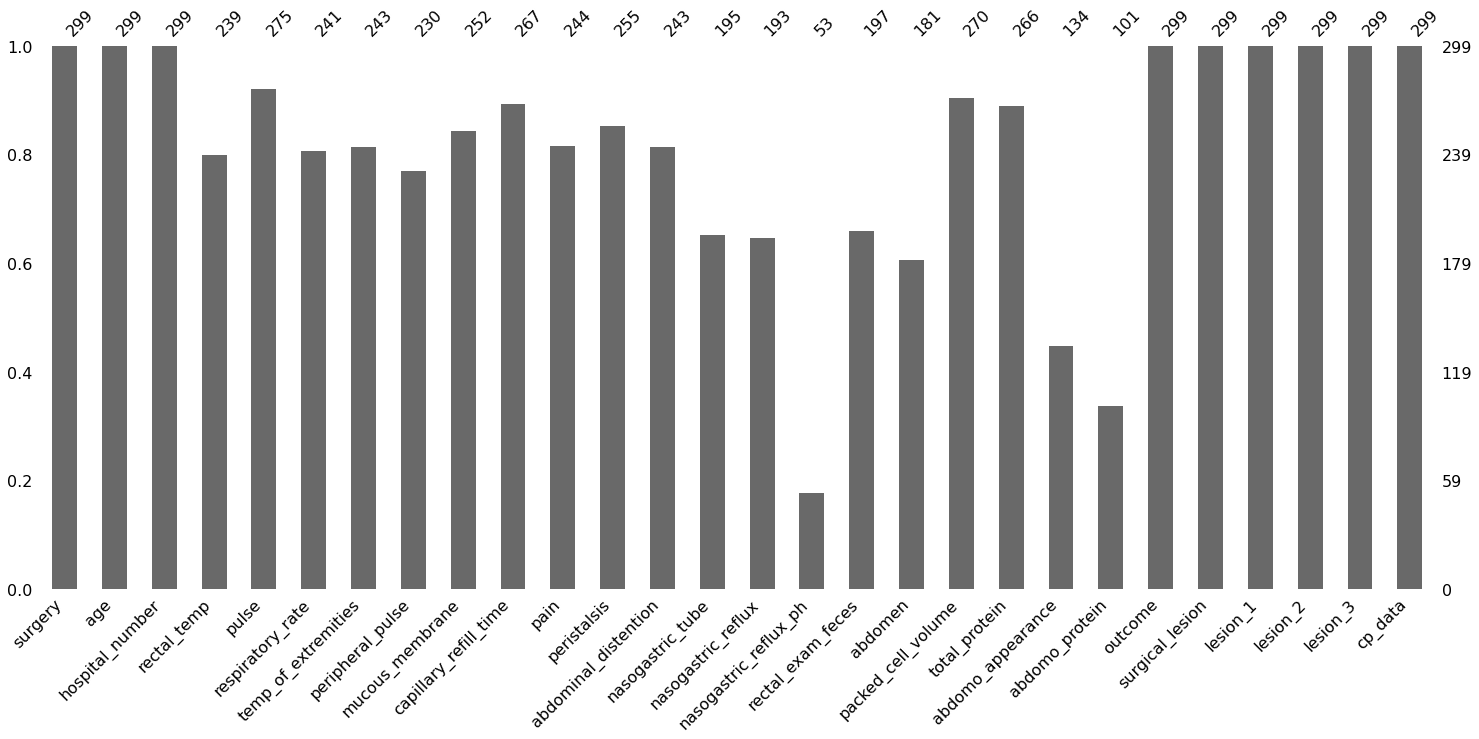

In [ ]:
import missingno as msno

msno.bar(dataset)

# **Limpieza de datos**

##**SURGERY**

**1 = Yes, it had surgery**

**2 = It was treated without surgery**

In [ ]:
dataset['surgery'].value_counts()

yes    180
no     119
Name: surgery, dtype: int64

In [ ]:
dataset['surgery'] = dataset['surgery'].map({'yes': 1, 'no':0})

In [ ]:
dataset.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,nasogastric_reflux_ph,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,0,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,extreme_pain,absent,severe,NaN,NaN,NaN,decreased,distend_large,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,1,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,mild_pain,absent,slight,NaN,NaN,NaN,absent,other,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,0,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,NaN,NaN,NaN,normal,normal,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,1,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,5.0,decreased,NaN,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,0,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


##**AGE**

**1 = Adult horse**

**2 = Young (< 6 months)**

In [ ]:
dataset['age'].value_counts()

adult    275
young     24
Name: age, dtype: int64

In [ ]:
dataset['age'] = dataset['age'].map({'adult': 1, 'young':0})
dataset['age'].value_counts()

1    275
0     24
Name: age, dtype: int64

##**Hospital Number: The case number assigned to the horse (may not be unique if the horse is treated > 1 time)**



In [ ]:
dataset['hospital_number'].value_counts()

529796    2
528931    2
528890    2
527544    2
528151    2
         ..
527698    1
530255    1
530254    1
533836    1
535043    1
Name: hospital_number, Length: 283, dtype: int64

In [ ]:
# No nos aporta mucha información
# En todo caso puede ser interesante el número de hospitalizaciones (NH)

dataset['NH'] = dataset['hospital_number'].map(lambda x: (dataset['hospital_number'] == x).sum())
dataset = dataset.drop(['hospital_number'], axis=1)

In [ ]:
dataset['NH'].value_counts()

1    267
2     32
Name: NH, dtype: int64

##**Pulse**

In [ ]:
nan_per=dataset['pulse'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

8.03  % valores nulos


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


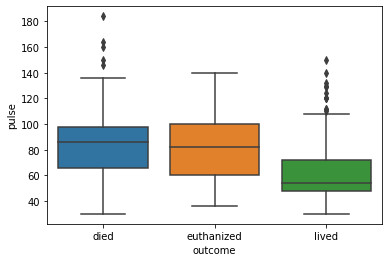

In [ ]:
sns.boxplot('outcome', 'pulse', data = dataset)

In [ ]:
dataset.pulse.describe()

count    275.000000
mean      72.000000
std       28.646219
min       30.000000
25%       48.000000
50%       64.000000
75%       88.000000
max      184.000000
Name: pulse, dtype: float64

In [ ]:
# Simplemente consideramos la media:
dataset['pulse']=dataset['pulse'].fillna(dataset['pulse'].mean())

In [ ]:
# Podemos considerar normal 1 (48-88), alto 2 (> 88), bajo 3 (< 48)
dataset.pulse.describe()


count    299.000000
mean      72.000000
std       27.468469
min       30.000000
25%       48.500000
50%       68.000000
75%       88.000000
max      184.000000
Name: pulse, dtype: float64

##**Respiratory Rate**

In [ ]:
nan_per=dataset['respiratory_rate'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

19.4  % valores nulos


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


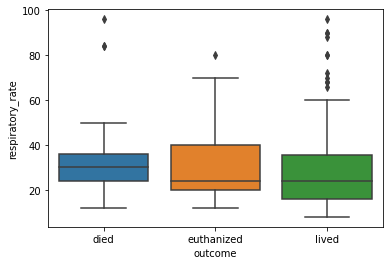

In [ ]:
sns.boxplot('outcome', 'respiratory_rate', data = dataset)

In [ ]:
dataset.respiratory_rate.describe()

count    241.000000
mean      30.460581
std       17.666102
min        8.000000
25%       18.000000
50%       25.000000
75%       36.000000
max       96.000000
Name: respiratory_rate, dtype: float64

In [ ]:
# Simplemente consideramos la media:
dataset['respiratory_rate']=dataset['respiratory_rate'].fillna(dataset['respiratory_rate'].mean())

In [ ]:
dataset.respiratory_rate.describe()

count    299.000000
mean      30.460581
std       15.853977
min        8.000000
25%       20.000000
50%       30.000000
75%       34.500000
max       96.000000
Name: respiratory_rate, dtype: float64

##**Temperature of Extremities**

In [ ]:
nan_per=dataset['temp_of_extremities'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

18.73  % valores nulos


In [ ]:
dataset.temp_of_extremities.value_counts()

cool      108
normal     78
warm       30
cold       27
Name: temp_of_extremities, dtype: int64

In [ ]:
# El valor mas repetido es cool asi que introducimos ese valor en todas las ocurencias que están a NaN
dataset['temp_of_extremities'].fillna('cool' , inplace=True)
dataset['temp_of_extremities']=dataset['temp_of_extremities'].astype('category').cat.codes
dataset['temp_of_extremities'].unique()

array([1, 2, 0, 3], dtype=int8)

##**Rectal Temperature**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


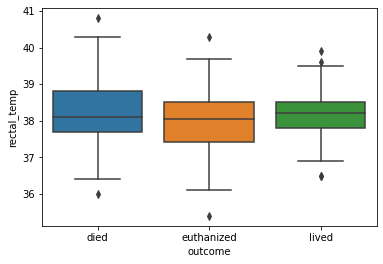

In [ ]:
# Vemos que relación tienen con cp_data, la variable objetivo

sns.boxplot('outcome', 'rectal_temp', data = dataset)

In [ ]:
# Y el total y el porcentaje de valores nulos

dataset['rectal_temp'].isna().value_counts()

False    239
True      60
Name: rectal_temp, dtype: int64

In [ ]:
nan_per=dataset['rectal_temp'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

20.07  % valores nulos


Para rellenar los valores nulos tenemos varias posibilidades:

In [ ]:
# Vamos a usar RandomForestRegressor

from sklearn.ensemble import RandomForestRegressor

# Consideramos que influyen los siguientes campos:
dataset_sub = dataset[['rectal_temp', 'pulse','respiratory_rate','temp_of_extremities']]

# Dividimos la base de datos en dos grupos:
# por un lado la temperatura, que lo ponemos en y,
# y lo que nos sirve para predecir la temperatura, que lo ponemos en X (en X ponemos las variable y en y el target).
# Y en ambos casos se ejecuta dropna para eliminar los valores nulos.
X_train  = dataset_sub.dropna(subset=['rectal_temp']).drop('rectal_temp', axis=1)
y_train  = dataset['rectal_temp'].dropna()
X_test = dataset_sub.loc[np.isnan(dataset_sub.rectal_temp)].drop('rectal_temp', axis=1)

#Aplicamos el algortimo
regressor = RandomForestRegressor(n_estimators = 300)
regressor.fit(X_train, y_train)
#Predecimos los valores que nos faltan
y_pred = np.round(regressor.predict(X_test),1)
dataset.rectal_temp.loc[np.isnan(dataset.rectal_temp)] = y_pred


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
dataset['rectal_temp'].unique()

array([38.5, 39.2, 38.3, 39.1, 37.3, 37.7, 37.9, 38.1, 37.2, 38. , 38.2,
       37.6, 38.8, 37.5, 39.4, 39.9, 38.4, 38.6, 37.8, 38.7, 37.4, 37.1,
       39. , 35.4, 38.9, 40.3, 37. , 39.7, 36.4, 39.6, 36.8, 39.5, 36.5,
       36. , 39.3, 36.1, 36.6, 40.8, 36.9, 40. ])

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int64  
 1   age                    299 non-null    int64  
 2   rectal_temp            299 non-null    float64
 3   pulse                  299 non-null    float64
 4   respiratory_rate       299 non-null    float64
 5   temp_of_extremities    299 non-null    int8   
 6   peripheral_pulse       230 non-null    object 
 7   mucous_membrane        252 non-null    object 
 8   capillary_refill_time  267 non-null    object 
 9   pain                   244 non-null    object 
 10  peristalsis            255 non-null    object 
 11  abdominal_distention   243 non-null    object 
 12  nasogastric_tube       195 non-null    object 
 13  nasogastric_reflux     193 non-null    object 
 14  nasogastric_reflux_ph  53 non-null     float64
 15  rectal

##**Peripheral pulse**

In [ ]:
nan_per=dataset['peripheral_pulse'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

23.08  % valores nulos


In [ ]:
dataset.peripheral_pulse.value_counts()

normal       114
reduced      103
absent         8
increased      5
Name: peripheral_pulse, dtype: int64

In [ ]:
# El valor mas repetido es normal asi que introducimos ese valor en todas las ocurencias que están a NaN
dataset['peripheral_pulse'].fillna('normal' , inplace=True)
dataset['peripheral_pulse']=dataset['peripheral_pulse'].astype('category').cat.codes
dataset['peripheral_pulse'].unique()

array([3, 2, 0, 1], dtype=int8)

##**Mucuos membranes**

In [ ]:
nan_per=dataset['mucous_membrane'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

15.72  % valores nulos


In [ ]:
dataset.mucous_membrane.value_counts()

normal_pink      79
pale_pink        57
pale_cyanotic    41
bright_pink      30
bright_red       25
dark_cyanotic    20
Name: mucous_membrane, dtype: int64

In [ ]:
dataset['mucous_membrane'].fillna('normal_pink' , inplace=True)
dataset['mucous_membrane']=dataset['mucous_membrane'].astype('category').cat.codes
dataset['mucous_membrane'].unique()

array([3, 4, 5, 2, 1, 0], dtype=int8)

##**Capillary refill time (a clinical judgement, the longer the refill, the poorer the circulation)**

In [ ]:
nan_per=dataset['capillary_refill_time'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

10.7  % valores nulos


In [ ]:
dataset.capillary_refill_time.value_counts()

less_3_sec    187
more_3_sec     78
3               2
Name: capillary_refill_time, dtype: int64

In [ ]:
dataset['capillary_refill_time'].fillna('less_3_sec' , inplace=True)
dataset['capillary_refill_time']=dataset['capillary_refill_time'].astype('category').cat.codes
dataset['capillary_refill_time'].unique()

array([2, 1, 0], dtype=int8)

##**Pain**

In [ ]:
nan_per=dataset['pain'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

18.39  % valores nulos


In [ ]:
dataset.pain.value_counts()

mild_pain       67
depressed       59
extreme_pain    42
alert           38
severe_pain     38
Name: pain, dtype: int64

In [ ]:
dataset['pain'].fillna('mild_pain' , inplace=True)
dataset['pain']=dataset['pain'].astype('category').cat.codes
dataset['pain'].unique()

array([2, 3, 1, 4, 0], dtype=int8)

##**Peristalsis (an indication of the activity in the horse's gut)**

In [ ]:
nan_per=dataset['peristalsis'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

14.72  % valores nulos


In [ ]:
dataset.peristalsis.value_counts()

hypomotile     127
absent          73
hypermotile     39
normal          16
Name: peristalsis, dtype: int64

In [ ]:
dataset['peristalsis'].fillna('hypomotile' , inplace=True)
dataset['peristalsis']=dataset['peristalsis'].astype('category').cat.codes
dataset['peristalsis'].unique()

array([0, 2, 1, 3], dtype=int8)

##**Abdominal distension**

In [ ]:
nan_per=dataset['abdominal_distention'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

18.73  % valores nulos


In [ ]:
dataset.abdominal_distention.value_counts()

none        75
moderate    65
slight      65
severe      38
Name: abdominal_distention, dtype: int64

In [ ]:
dataset['abdominal_distention'].fillna('none' , inplace=True)
dataset['abdominal_distention']=dataset['abdominal_distention'].astype('category').cat.codes
dataset['abdominal_distention'].unique()

array([2, 3, 1, 0], dtype=int8)

##**Nasogastric tube (refers to any gas coming out of the tube)**

In [ ]:
nan_per=dataset['nasogastric_tube'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

34.78  % valores nulos


In [ ]:
dataset.nasogastric_tube.value_counts()

slight         101
none            71
significant     23
Name: nasogastric_tube, dtype: int64

In [ ]:
dataset['nasogastric_tube'].fillna('slight' , inplace=True)
dataset['nasogastric_tube']=dataset['nasogastric_tube'].astype('category').cat.codes
dataset['nasogastric_tube'].unique()

array([2, 0, 1], dtype=int8)

##**Nasogastric reflux**

In [ ]:
nan_per=dataset['nasogastric_reflux'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

35.45  % valores nulos


In [ ]:
dataset.nasogastric_reflux.value_counts()

none            119
more_1_liter     39
less_1_liter     35
Name: nasogastric_reflux, dtype: int64

In [ ]:
dataset['nasogastric_reflux'].fillna('none' , inplace=True)
dataset['nasogastric_reflux']=dataset['nasogastric_reflux'].astype('category').cat.codes
dataset['nasogastric_reflux'].unique()

array([2, 0, 1], dtype=int8)

##**Nasogastric reflux PH**

In [ ]:
nan_per=dataset['nasogastric_reflux_ph'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

82.27  % valores nulos


In [ ]:
# Eliminamos la columna
dataset = dataset.drop(['nasogastric_reflux_ph'], axis=1)

##**Rectal examination - feces**

In [ ]:
nan_per=dataset['rectal_exam_feces'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

34.11  % valores nulos


In [ ]:
dataset.rectal_exam_feces.value_counts()

absent       79
normal       57
decreased    48
increased    13
Name: rectal_exam_feces, dtype: int64

In [ ]:
dataset['rectal_exam_feces'].fillna('absent' , inplace=True)
dataset['rectal_exam_feces']=dataset['rectal_exam_feces'].astype('category').cat.codes
dataset['rectal_exam_feces'].unique()

array([1, 0, 3, 2], dtype=int8)

##**Abdomen**

In [ ]:
nan_per=dataset['abdomen'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

39.46  % valores nulos


In [ ]:
dataset.abdomen.value_counts()

distend_large    78
distend_small    43
normal           28
other            19
firm             13
Name: abdomen, dtype: int64

In [ ]:
dataset['abdomen'].fillna('distend_large' , inplace=True)
dataset['abdomen']=dataset['abdomen'].astype('category').cat.codes
dataset['abdomen'].unique()

array([0, 4, 3, 2, 1], dtype=int8)

##**Packed_cell_volume (red cells by volume in the blood)**

In [ ]:
nan_per=dataset['packed_cell_volume'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

9.7  % valores nulos


In [ ]:
# Simplemente consideramos la media:
dataset['packed_cell_volume']=dataset['packed_cell_volume'].fillna(dataset['packed_cell_volume'].mean())

In [ ]:
dataset.packed_cell_volume.describe()

count    299.000000
mean      46.307407
std        9.915919
min       23.000000
25%       39.000000
50%       46.000000
75%       50.000000
max       75.000000
Name: packed_cell_volume, dtype: float64

##**Total protein**

In [ ]:
nan_per=dataset['total_protein'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

11.04  % valores nulos


In [ ]:
# Simplemente consideramos la media:
dataset['total_protein']=dataset['total_protein'].fillna(dataset['total_protein'].mean())

In [ ]:
dataset.packed_cell_volume.describe()

count    299.000000
mean      46.307407
std        9.915919
min       23.000000
25%       39.000000
50%       46.000000
75%       50.000000
max       75.000000
Name: packed_cell_volume, dtype: float64

##**Abdominocentesis appearance (a needle is put in the horse's abdomen and fluid is obtained from the abdominal cavity)**

In [ ]:
nan_per=dataset['abdomo_appearance'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

55.18  % valores nulos


In [ ]:
# Eliminamos la columna
dataset = dataset.drop(['abdomo_appearance'], axis=1)

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int64  
 1   age                    299 non-null    int64  
 2   rectal_temp            299 non-null    float64
 3   pulse                  299 non-null    float64
 4   respiratory_rate       299 non-null    float64
 5   temp_of_extremities    299 non-null    int8   
 6   peripheral_pulse       299 non-null    int8   
 7   mucous_membrane        299 non-null    int8   
 8   capillary_refill_time  299 non-null    int8   
 9   pain                   299 non-null    int8   
 10  peristalsis            299 non-null    int8   
 11  abdominal_distention   299 non-null    int8   
 12  nasogastric_tube       299 non-null    int8   
 13  nasogastric_reflux     299 non-null    int8   
 14  rectal_exam_feces      299 non-null    int8   
 15  abdome

##**Abdomcentesis total protein**

In [ ]:
nan_per=dataset['abdomo_protein'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

66.22  % valores nulos


In [ ]:
# Eliminamos la columna
dataset = dataset.drop(['abdomo_protein'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int64  
 1   age                    299 non-null    int64  
 2   rectal_temp            299 non-null    float64
 3   pulse                  299 non-null    float64
 4   respiratory_rate       299 non-null    float64
 5   temp_of_extremities    299 non-null    int8   
 6   peripheral_pulse       299 non-null    int8   
 7   mucous_membrane        299 non-null    int8   
 8   capillary_refill_time  299 non-null    int8   
 9   pain                   299 non-null    int8   
 10  peristalsis            299 non-null    int8   
 11  abdominal_distention   299 non-null    int8   
 12  nasogastric_tube       299 non-null    int8   
 13  nasogastric_reflux     299 non-null    int8   
 14  rectal_exam_feces      299 non-null    int8   
 15  abdome

##**Outcome (what eventually happened to the horse?)**

In [ ]:
nan_per=dataset['outcome'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

0.0  % valores nulos


In [ ]:
dataset.outcome.value_counts()

lived         178
died           77
euthanized     44
Name: outcome, dtype: int64

In [ ]:
dataset['outcome']=dataset['outcome'].astype('category').cat.codes
dataset['outcome'].unique()

array([0, 1, 2], dtype=int8)

##**Surgical lesion?**

In [ ]:
nan_per=dataset['surgical_lesion'].isna().sum()/len(dataset)*100
print (round(nan_per,2), ' % valores nulos')

0.0  % valores nulos


In [ ]:
dataset['surgical_lesion'].value_counts()

yes    190
no     109
Name: surgical_lesion, dtype: int64

In [ ]:
dataset['surgical_lesion'] = dataset['surgical_lesion'].map({'yes': 1, 'no':0})
dataset['surgical_lesion'].value_counts()

1    190
0    109
Name: surgical_lesion, dtype: int64

##**Lesion**

In [ ]:
dataset['lesion_1'].value_counts()

0        56
3111     32
3205     29
2208     20
2205     13
         ..
11400     1
7400      1
3113      1
3300      1
41110     1
Name: lesion_1, Length: 61, dtype: int64

In [ ]:
dataset['lesion_2'].value_counts()

0       292
3111      3
6112      1
7111      1
1400      1
3112      1
Name: lesion_2, dtype: int64

In [ ]:
dataset['lesion_3'].value_counts()

0       298
2209      1
Name: lesion_3, dtype: int64

In [ ]:
# lesion1, 2 and 3 son datos con formato, cada dígito tiene un significado por lo que no nos sirve
# Se puede crear una nueva caracterísca simplemente con el total de lesiones
dataset.loc[dataset['lesion_1'] > 0, 'lesion_1'] = 1
dataset.loc[dataset['lesion_2'] > 0, 'lesion_2'] = 1
dataset.loc[dataset['lesion_3'] > 0, 'lesion_3'] = 1

dataset['TL'] = dataset['lesion_1'] + dataset['lesion_2'] + dataset['lesion_3']
dataset = dataset.drop(columns = ['lesion_1','lesion_2', 'lesion_3'], axis = 1)
dataset['TL'].value_counts()

1    236
0     56
2      6
3      1
Name: TL, dtype: int64

##**CP Data (No es significativa)**

In [ ]:
# Eliminamos la columna
dataset = dataset.drop(['cp_data'], axis=1)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    int64  
 1   age                    299 non-null    int64  
 2   rectal_temp            299 non-null    float64
 3   pulse                  299 non-null    float64
 4   respiratory_rate       299 non-null    float64
 5   temp_of_extremities    299 non-null    int8   
 6   peripheral_pulse       299 non-null    int8   
 7   mucous_membrane        299 non-null    int8   
 8   capillary_refill_time  299 non-null    int8   
 9   pain                   299 non-null    int8   
 10  peristalsis            299 non-null    int8   
 11  abdominal_distention   299 non-null    int8   
 12  nasogastric_tube       299 non-null    int8   
 13  nasogastric_reflux     299 non-null    int8   
 14  rectal_exam_feces      299 non-null    int8   
 15  abdome

##**Otra posibilidad**

In [ ]:
# Como lo que hemos hecho para las columnas de tipo object que tienen valores nan que no superen el 40 %
# es completar el dato con el valor más frecuente también se podría hacer de la siguiente forma:

#obj=[]
#for col in dataset.columns.values:
#    if dataset[col].dtype=='object':
#        obj.append(col)
#ds_obj=dataset[obj]

#for col in ds_obj.columns.values:
#    if (pd.isna(ds_obj[col]).sum()) > 0:
#        if pd.isna(ds_obj[col]).sum() > (40/100*len(ds_obj)):
#            ds_obj=ds_obj.drop([col], axis=1)
#        else:
#            ds_obj[col]=ds_obj[col].fillna(ds_obj[col].mode()[0])
#            ds_obj[col]=ds_obj[col].astype('category').cat.codes

#ds_obj.info()

#**Normalización 1**

In [ ]:
dataset.describe()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,NH,TL
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.602007,0.919732,38.190635,72.000000,30.460581,1.371237,2.274247,2.983278,1.254181,2.210702,1.434783,1.344482,1.448161,1.635452,0.819398,0.765886,46.307407,24.274436,1.337793,0.635452,1.107023,0.839465
std,0.490305,0.272162,0.685159,27.468469,15.853977,0.785337,0.627961,1.486986,0.451256,1.258162,0.918633,1.048358,0.851265,0.683615,1.176172,1.263334,9.915919,25.804620,0.860940,0.482110,0.309661,0.442288
min,0.000000,0.000000,35.400000,30.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.000000,3.300000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,1.000000,37.800000,48.500000,20.000000,1.000000,2.000000,2.500000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,0.000000,0.000000,39.000000,6.600000,0.000000,0.000000,1.000000,1.000000
50%,1.000000,1.000000,38.200000,68.000000,30.000000,1.000000,2.000000,3.000000,1.000000,3.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,46.000000,7.700000,2.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,38.600000,88.000000,34.500000,2.000000,3.000000,4.000000,2.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,50.000000,52.000000,2.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,40.800000,184.000000,96.000000,3.000000,3.000000,5.000000,2.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,4.000000,75.000000,89.000000,2.000000,1.000000,2.000000,3.000000


In [ ]:
def normalize (horses):
  result = horses.copy()

  for feature_name in horses.columns:
    max_value = horses[feature_name].max()
    min_value = horses[feature_name].min()
    result[feature_name] = (horses[feature_name] - min_value) / (max_value - min_value)
  return result

dataset_nor = normalize(dataset)
dataset_nor.describe()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,NH,TL
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000
mean,0.602007,0.919732,0.516784,0.272727,0.255234,0.457079,0.758082,0.596656,0.627090,0.552676,0.478261,0.448161,0.724080,0.817726,0.273133,0.191472,0.448219,0.244743,0.668896,0.635452,0.107023,0.279822
std,0.490305,0.272162,0.126881,0.178367,0.180159,0.261779,0.209320,0.297397,0.225628,0.314541,0.306211,0.349453,0.425633,0.341808,0.392057,0.315834,0.190691,0.301104,0.430470,0.482110,0.309661,0.147429
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.444444,0.120130,0.136364,0.333333,0.666667,0.500000,0.500000,0.250000,0.333333,0.333333,0.500000,1.000000,0.000000,0.000000,0.307692,0.038506,0.000000,0.000000,0.000000,0.333333
50%,1.000000,1.000000,0.518519,0.246753,0.250000,0.333333,0.666667,0.600000,0.500000,0.750000,0.666667,0.333333,1.000000,1.000000,0.000000,0.000000,0.442308,0.051342,1.000000,1.000000,0.000000,0.333333
75%,1.000000,1.000000,0.592593,0.376623,0.301136,0.666667,1.000000,0.800000,1.000000,0.750000,0.666667,0.666667,1.000000,1.000000,0.333333,0.250000,0.519231,0.568261,1.000000,1.000000,0.000000,0.333333
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#**Normalización 2**

In [ ]:
from sklearn.preprocessing import StandardScaler

target = dataset['outcome']
dataset_nor = dataset.drop(columns = ['outcome'], axis = 1)
features = dataset_nor.columns
scaler = StandardScaler()
scaledTrain = scaler.fit_transform(dataset_nor)
dfTrain = pd.DataFrame(data=scaledTrain, columns=features)
dfTrain.head()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,surgical_lesion,NH,TL
0,-1.229880,0.295420,0.452280,-0.218798,-0.155463,-0.473504,1.157667,0.011265,1.655535,-0.167749,-1.564485,0.626329,0.649345,0.534160,0.153808,-0.607258,-0.132070,-0.616209,-1.320272,-0.346194,0.363574
1,0.813087,0.295420,1.475654,0.583463,-0.660914,-0.473504,-0.437459,0.684893,-0.564218,0.628393,-1.564485,1.581801,0.649345,0.534160,-0.697833,2.564274,0.373015,2.357228,-1.320272,-0.346194,0.363574
2,-1.229880,0.295420,0.159887,-1.166925,-0.408189,0.801970,-0.437459,1.358522,-0.564218,0.628393,0.616312,-0.329142,0.649345,0.534160,1.857090,1.771391,-1.344274,-0.682199,-1.320272,-0.346194,-1.901188
3,0.813087,-3.385016,1.329457,3.354910,3.382695,-1.748977,-0.437459,-0.662364,1.655535,-0.963892,-1.564485,0.626329,-1.704038,-2.396368,0.153808,-0.607258,0.170981,-0.662791,0.757419,-0.346194,0.363574
4,-1.229880,0.295420,-1.302076,1.166925,0.286807,-0.473504,-0.437459,-0.662364,1.655535,0.628393,0.616312,-0.329142,0.649345,0.534160,-0.697833,-0.607258,2.797423,-0.655027,-1.320272,-0.346194,0.363574


#**Reducción de dimensionalidad**

##**Feature importance**

In [ ]:
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

# Feature_importances of tree based classifiers
X = dataset.drop("outcome",1)    # Independent columns
y = dataset["outcome"]              # Target feature
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) # Use inbuilt class

NameError: ignored

In [ ]:
# plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

##**Varianza**
Se calcula la varianza de cada una de las variables y se descantan aquellas que tengan una varianza baja en comparación con las otras variables de nuestro conjunto de datos, ya que las variables con una varianza baja no afectarán a la variable objetivo.

In [ ]:
dataset.var()

In [ ]:
# Vamos a quitar aquellas variables cuya varianza sea menor a 0.1

dataset_var = dataset
var = dataset.var()

for col in range(len(var)):
  if var[col] < 0.1:
    dataset_var = dataset_var.drop([var.index[col]], axis=1)
dataset_var.info()

#**Correlation (Pearson)**

In [ ]:
import matplotlib.pyplot as plt

dataset.corr()

,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,NH,TL
surgery,1.000000,-0.089319,-0.016126,0.179646,0.181173,-0.190183,0.115915,0.041470,0.079588,0.228871,-0.061546,-0.150197,0.066982,-0.083910,-0.171611,-0.297202,0.040038,0.042420,-0.189222,0.605023,-0.005840,0.447152
age,-0.089319,1.000000,-0.198396,-0.507224,-0.375469,0.014282,-0.027843,0.170800,0.030065,-0.058242,-0.021008,0.038430,-0.018020,-0.085657,-0.003506,0.111078,0.144326,0.112925,0.101782,-0.044734,0.102272,-0.051652
rectal_temp,-0.016126,-0.198396,1.000000,0.228174,0.243030,-0.067107,-0.008050,-0.149689,0.091296,-0.080619,-0.061753,-0.033802,-0.029027,-0.011612,-0.049160,-0.053715,0.049848,-0.050589,-0.008841,-0.007322,0.105964,-0.032661
pulse,0.179646,-0.507224,0.228174,1.000000,0.439825,-0.287472,0.247265,-0.047240,0.375765,0.125354,-0.277144,-0.073880,-0.030281,-0.108653,-0.208565,-0.208004,0.369850,-0.079947,-0.344670,0.259733,-0.012624,0.277042
respiratory_rate,0.181173,-0.375469,0.243030,0.439825,1.000000,-0.027365,0.132643,-0.080842,0.083410,0.097621,-0.057862,-0.034526,-0.031858,-0.165818,-0.026901,-0.164523,0.073790,-0.077715,-0.079408,0.218532,-0.045519,0.181100
temp_of_extremities,-0.190183,0.014282,-0.067107,-0.287472,-0.027365,1.000000,-0.193530,-0.089494,-0.257690,-0.188108,0.194146,0.043866,-0.058958,0.077912,0.269007,0.169069,-0.287791,0.030805,0.290367,-0.226318,-0.081131,-0.223948
peripheral_pulse,0.115915,-0.027843,-0.008050,0.247265,0.132643,-0.193530,1.000000,0.080396,0.226861,0.062531,-0.224845,-0.133792,-0.067478,-0.227529,-0.132625,-0.121833,0.239227,-0.038235,-0.165719,0.165077,0.038381,0.195295
mucous_membrane,0.041470,0.170800,-0.149689,-0.047240,-0.080842,-0.089494,0.080396,1.000000,-0.058657,0.154351,-0.173991,-0.007055,0.064263,-0.039029,-0.028594,0.017558,-0.132105,-0.011503,0.056852,0.075724,0.084064,0.108157
capillary_refill_time,0.079588,0.030065,0.091296,0.375765,0.083410,-0.257690,0.226861,-0.058657,1.000000,0.059026,-0.235108,0.034186,-0.026733,-0.166372,-0.172442,-0.142492,0.472536,-0.069844,-0.256294,0.165131,0.188904,0.205135
pain,0.228871,-0.058242,-0.080619,0.125354,0.097621,-0.188108,0.062531,0.154351,0.059026,1.000000,-0.024363,-0.065390,0.099528,-0.050850,-0.130667,-0.296097,0.025235,-0.075915,-0.161964,0.276427,-0.049461,0.272051


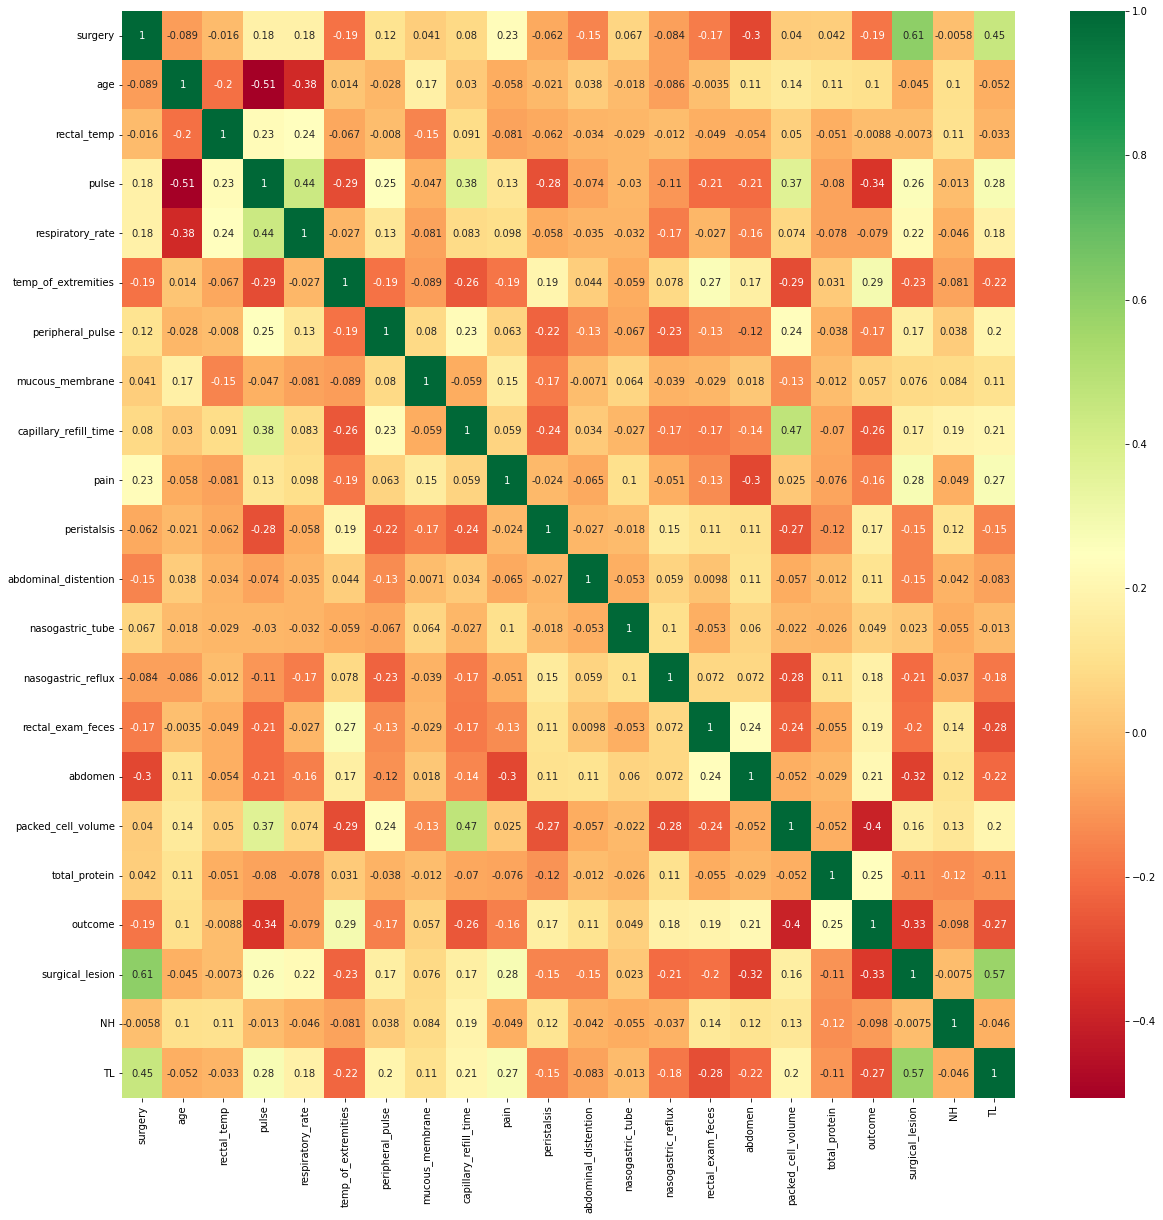

In [ ]:
plt.figure(figsize=(20,20))
g=sns.heatmap(dataset.corr(), annot=True, cmap="RdYlGn")

In [ ]:
# Tenemos dos variables muy correlacionadas, surgical_lesion y surgery
# Nos quedamos con surgical_lesion porque es la que está más correlacionada con la variable objetivo que es outcome
dataset_cor = dataset.drop(['surgery'], axis=1)
dataset_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    299 non-null    int64  
 1   rectal_temp            299 non-null    float64
 2   pulse                  299 non-null    float64
 3   respiratory_rate       299 non-null    float64
 4   temp_of_extremities    299 non-null    int8   
 5   peripheral_pulse       299 non-null    int8   
 6   mucous_membrane        299 non-null    int8   
 7   capillary_refill_time  299 non-null    int8   
 8   pain                   299 non-null    int8   
 9   peristalsis            299 non-null    int8   
 10  abdominal_distention   299 non-null    int8   
 11  nasogastric_tube       299 non-null    int8   
 12  nasogastric_reflux     299 non-null    int8   
 13  rectal_exam_feces      299 non-null    int8   
 14  abdomen                299 non-null    int8   
 15  packed

In [ ]:
correlaciones = abs(dataset_cor.corr()['outcome']).sort_values(ascending=False)
print (correlaciones)


outcome                  1.000000
packed_cell_volume       0.401140
pulse                    0.344670
surgical_lesion          0.332933
temp_of_extremities      0.290367
TL                       0.271305
capillary_refill_time    0.256294
total_protein            0.245657
abdomen                  0.214875
rectal_exam_feces        0.193004
nasogastric_reflux       0.181422
peristalsis              0.165844
peripheral_pulse         0.165719
pain                     0.161964
abdominal_distention     0.112309
age                      0.101782
NH                       0.098297
respiratory_rate         0.079408
mucous_membrane          0.056852
nasogastric_tube         0.049156
rectal_temp              0.001790
Name: outcome, dtype: float64


In [ ]:
# En este caso eliminaremos aquellos atributos que tengan una correlación inferior a 0.1

for col in range(len(correlaciones)):
  if abs(correlaciones[col]) < 0.1:
    dataset_cor = dataset_cor.drop([correlaciones.index[col]], axis=1)

In [ ]:
dataset_cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   age                    299 non-null    int64  
 1   pulse                  299 non-null    float64
 2   temp_of_extremities    299 non-null    int8   
 3   peripheral_pulse       299 non-null    int8   
 4   capillary_refill_time  299 non-null    int8   
 5   pain                   299 non-null    int8   
 6   peristalsis            299 non-null    int8   
 7   abdominal_distention   299 non-null    int8   
 8   nasogastric_reflux     299 non-null    int8   
 9   rectal_exam_feces      299 non-null    int8   
 10  abdomen                299 non-null    int8   
 11  packed_cell_volume     299 non-null    float64
 12  total_protein          299 non-null    float64
 13  outcome                299 non-null    int8   
 14  surgical_lesion        299 non-null    int64  
 15  TL    

#**Backward elimination**

In [ ]:
import statsmodels.api as sm

X = dataset
y = dataset["outcome"]
dataset.head()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,surgery,age,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,packed_cell_volume,total_protein,outcome,surgical_lesion,NH,TL
0,0,1,38.5,66.0,28.0,1,3,3,2,2,0,2,2,2,1,0,45.0,8.4,0,0,1,1
1,1,1,39.2,88.0,20.0,1,2,4,1,3,0,3,2,2,0,4,50.0,85.0,1,0,1,1
2,0,1,38.3,40.0,24.0,2,2,5,1,3,2,1,2,2,3,3,33.0,6.7,2,0,1,0
3,1,0,39.1,164.0,84.0,0,2,2,2,1,0,2,0,0,1,0,48.0,7.2,0,1,1,1
4,0,1,37.3,104.0,35.0,1,2,2,2,3,2,1,2,2,0,0,74.0,7.4,0,0,1,1


In [ ]:
cols = list(X.columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

['pulse', 'total_protein', 'outcome']


#**PCA 1**

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Normalizamos los datos
scaler=StandardScaler()
df = dataset.drop(['outcome'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df) # calculo la media para poder hacer la transformacion
X_scaled=scaler.transform(df)# Ahora si, escalo los datos y los normalizo

In [ ]:
# Instanciamos PCA
pca=PCA(n_components=15) # Otra opción es instanciar pca sólo con dimensiones nuevas hasta obtener un mínimo "explicado" ej.: pca=PCA(.85)
pca.fit(X_scaled) # obtener los componentes principales
X_pca=pca.transform(X_scaled) # convertimos nuestros datos con las nuevas dimensiones de PCA

In [ ]:
print("shape of X_pca", X_pca.shape)
expl = pca.explained_variance_ratio_
print(expl)
print('suma:',sum(expl[0:14]))

shape of X_pca (299, 15)
[0.17753306 0.08919417 0.0872422  0.06417696 0.05611848 0.05396562
 0.05031584 0.0466552  0.04501595 0.04100125 0.03926609 0.03501438
 0.03336274 0.03249227 0.02952479]
suma: 0.8513542114733368


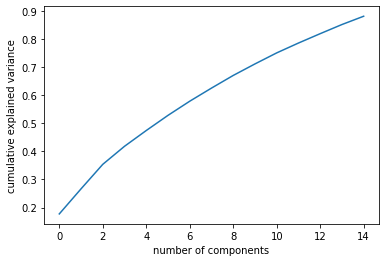

In [ ]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#**PCA 2**

In [ ]:
dataset.keys()

Index(['surgery', 'age', 'rectal_temp', 'pulse', 'respiratory_rate',
       'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane',
       'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention',
       'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces',
       'abdomen', 'packed_cell_volume', 'total_protein', 'outcome',
       'surgical_lesion', 'NH', 'TL'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
df = dataset.drop(['outcome'], axis=1) # quito la variable dependiente "Y"
scaler.fit(df)
scaled_data=scaler.transform(df)
scaled_data


array([[-1.22988009,  0.29541958,  0.46158751, ..., -1.32027242,
        -0.34619386,  0.36357377],
       [ 0.81308739,  0.29541958,  1.48826409, ..., -1.32027242,
        -0.34619386,  0.36357377],
       [-1.22988009,  0.29541958,  0.16825135, ..., -1.32027242,
        -0.34619386, -1.90118784],
       ...,
       [ 0.81308739,  0.29541958, -1.00509331, ...,  0.75741944,
        -0.34619386,  0.36357377],
       [ 0.81308739,  0.29541958, -2.47177413, ...,  0.75741944,
        -0.34619386,  0.36357377],
       [ 0.81308739,  0.29541958, -1.44509756, ..., -1.32027242,
        -0.34619386,  0.36357377]])

In [ ]:
from sklearn.decomposition import PCA

pca=PCA(n_components=2)
pca.fit(scaled_data)
x_pca=pca.transform(scaled_data)

(299, 21)

Text(0, 0.5, 'Second principle component')

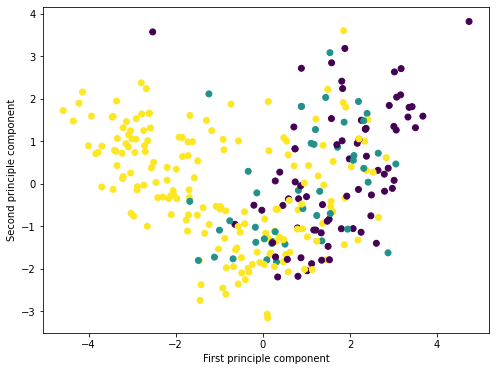

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=dataset['outcome'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')